<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2 
# *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [26]:
X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
y = np.array([-1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

0 [-2  4]
1 [4 1]
2 [1 6]
3 [2 4]
4 [6 2]


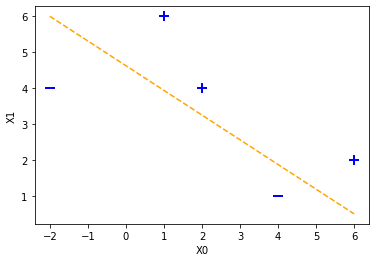

In [3]:
def plotData(X):
    for d, sample in enumerate(X):
        print(d, sample)
        # Plot the samples labelled 'negative -'
        if d < 2:
            plt.scatter(sample[0], sample[1], s = 120, marker = '_', color = 'blue', linewidths = 2)
        # Plot the samples labelled 'positive +''
        else:
            plt.scatter(sample[0], sample[1], s = 120, marker = '+', color = 'blue', linewidths = 2)
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print a possible hyperplane, that is separating the two classes:
plt.plot([-2, 6], [6, 0.5], color = 'orange', linestyle = 'dashed');

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector (represented by ⟨x[i], w⟩ in code commments, below) will determine class membership: 

In [27]:
X = np.array([ [-2, 4, -1], [4, 1, -1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [5]:
def perceptron_sgd(Xt, Yt, eta = 1, epochs = 20):
    
    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))
    
    for t in range(epochs):
        print('\nepoch[%i]' %t)
        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):
            print('Xt[%i]: '%i, x)
            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            print('is np.dot(Xt[i], wt) * Yt[i] <= 0?: ',np.dot(Xt[i], wt) * Yt[i])
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]
                print('Updated weights: ', wt)

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [6]:
w = perceptron_sgd(X, y, epochs = 10)
print(w)


epoch[0]
Xt[0]:  [-2  4 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -0.0
Updated weights:  [ 2. -4.  1.]
Xt[1]:  [ 4  1 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -3.0
Updated weights:  [-2. -5.  2.]
Xt[2]:  [ 1  6 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -34.0
Updated weights:  [-1.  1.  1.]
Xt[3]:  [ 2  4 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  1.0
Xt[4]:  [ 6  2 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -5.0
Updated weights:  [5. 3. 0.]

epoch[1]
Xt[0]:  [-2  4 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -2.0
Updated weights:  [ 7. -1.  1.]
Xt[1]:  [ 4  1 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -26.0
Updated weights:  [ 3. -2.  2.]
Xt[2]:  [ 1  6 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -11.0
Updated weights:  [4. 4. 1.]
Xt[3]:  [ 2  4 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  23.0
Xt[4]:  [ 6  2 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  31.0

epoch[2]
Xt[0]:  [-2  4 -1]
is np.dot(Xt[i], wt) * Yt[i] <= 0?:  -7.0
Updated weights:  [6. 0. 2.]
Xt[1]:  [ 4  1 -1]
is np.dot(Xt[i], wt) * Yt[i] <=

Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

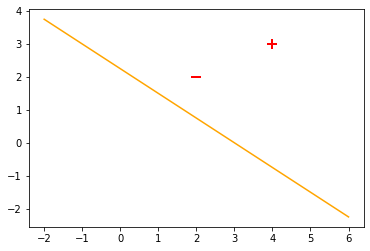

In [7]:
def plotHyperplane(wt):

    xx = np.linspace(-2,6)
    yy = (-wt[0]*xx + wt[2])/wt[1]
    plt.plot(xx, yy, color='orange')
    
#plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')    

So far, all of the negatively labelled points are misclassified! 

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[3. 4. 9.]


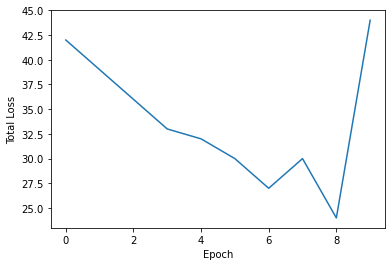

In [8]:
def perceptron_sgd_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                total_error += (np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(total_error * (-1))
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return wt

print(perceptron_sgd_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge. 

Try a increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

[ 2.  3. 13.]


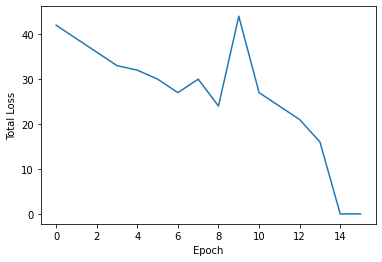

In [9]:
#?
w = perceptron_sgd_plot(X, y, epochs = 16)
print(w)

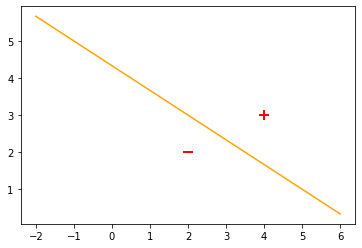

In [10]:
#?
plotHyperplane(w)

plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')    

Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [ ]:
#?
errors = []

total_error = 0
Xi = np.array([3.5, 3.3, -1])
y = np.array([-1])

print(type(Xi))
print(type(y))
print(type(w))

if (np.dot(Xi, w) * y) <= 0:
    total_error += (np.dot(Xi, w) * y)
    errors.append(total_error * (-1))
        
plt.plot(errors)
plt.ylabel('Total Loss')

In [ ]:
#TEST: make sure the training data get correctly classified:

#?
plotHyperplane(w)
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')   

## === End ===



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



